In [1]:
import numpy as np 
import urdf2casadi.urdfparser as u2c
from urdf2casadi.geometry import plucker
from urdf_parser_py.urdf import URDF, Pose
import PyKDL as kdl
import kdl_parser_py.urdf as kdlurdf
from timeit import Timer, timeit, repeat
import rbdl
import pybullet as pb


In [49]:
def median(lst):
    n = len(lst)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(lst)[n//2]
    else:
            return sum(sorted(lst)[n//2-1:n//2+1])/2.0
        
def average(lst): 
    return sum(lst) / len(lst) 


def c_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    kdl.ChainDynParam(kdlmodel, gravity_kdl).JntToCoriolis(q_kdl, qdot_kdl, g_kdl)


def c_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    c_u2c(q_none, qdot_none)
    
def c_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    
    c_pb = pb.calculateInverseDynamics(pbmodel, q_none, qdot_none, qddot)
    
def c_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.NonlinearEffects(rbdlmodel, q_np, qdot_np, c_rbdl)


def g_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    kdl.ChainDynParam(kdlmodel, gravity_kdl).JntToGravity(q_kdl, g_kdl)


def g_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    g_u2c(q_none)
    
def g_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    
    g_pb = pb.calculateInverseDynamics(pbmodel, q_none, qdot, qddot)
    
def g_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.InverseDynamics(rbdlmodel, q_np, qdot_np, qddot_np, g_rbdl)
    
    
def ID_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qddot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    ID_u2c(q_none, qdot_none, qddot_none)
    
def ID_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qddot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    
    ID_pb = pb.calculateInverseDynamics(pbmodel, q_none, qdot_none, qddot_none)
    
def ID_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qddot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.InverseDynamics(rbdlmodel, q_np, qdot_np, qddot_np, ID_rbdl)
    
    
def M_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    kdl.ChainDynParam(kdlmodel, gravity_kdl).JntToMass(q_kdl, M_kdl)


def M_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    M_u2c(q_none)
    
def M_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    #print q
    H = pb.calculateMassMatrix(pbmodel, q_none)
    
def M_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.CompositeRigidBodyAlgorithm(rbdlmodel, q_np, M_rbdl)
    
def aba_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        tau_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    aba_u2c(q_none, qdot_none, tau_none)
    
def crba_u2c_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        tau_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    
    crba_u2c(q_none, qdot_none, tau_none)
    
    
def fd_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        tau_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.ForwardDynamics(rbdlmodel, q_np, qdot_np, tau_np, qddot_np)



In [50]:
sim = pb.connect(pb.DIRECT)
ndofs = 10
urdf_nr = list(range(ndofs + 1))
urdf_nr.pop(0)


nitr = 1000
nrepeat = 100
    

path_to_urdf = "/home/lmjohann/urdf2casadi/examples/urdf/ur5_mod.urdf"
root = 'base_link'
tip = "tool0"

ok, kdl_tree = kdlurdf.treeFromFile(path_to_urdf)
kdlmodel = kdl_tree.getChain(root,tip)

rbdlmodel = rbdl.loadModel(path_to_urdf)
pbmodel = pb.loadURDF(path_to_urdf, useFixedBase=True, flags = pb.URDF_USE_INERTIA_FROM_FILE)
asd = u2c.URDFparser()
robot_desc = asd.from_file(path_to_urdf)

jlist, names, qmax, qmin = asd.get_joint_info(root, tip)
njoints = asd.get_n_joints(root, tip)

gravity_kdl = kdl.Vector()
gravity_kdl[2] = -9.81
gravity_u2c = [0, 0, -9.81]

#rbdl declarations
q_np = np.zeros(njoints)
qdot_np = np.zeros(njoints)
qddot_np = np.zeros(njoints)
g_rbdl = np.zeros(njoints)
c_rbdl = np.zeros(njoints)
ID_rbdl = np.zeros(njoints)

#kdl declatations
q_kdl = kdl.JntArray(njoints)
qdot_kdl = kdl.JntArray(njoints)
g_kdl = kdl.JntArray(njoints)

#u2c and pybullet declarations
q_none = [None]*njoints
qdot_none = [None]*njoints
qddot_none = [None]*njoints
g_pb = [None]*njoints

qddot = []
for i in range(njoints):
    qddot.append(0.)

qdot = []
for i in range(njoints):
    qdot.append(0.)
    
    
M_kdl = kdl.JntSpaceInertiaMatrix(njoints)
M_rbdl = (rbdlmodel.q_size, rbdlmodel.q_size)
M_rbdl = np.zeros(M_rbdl)
tau_np = np.zeros(njoints)
tau_none = [None]*njoints





The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/urdf/ur5_mod.urdf


In [45]:
g_u2c = asd.get_gravity_rnea(root, tip, gravity_u2c)
timeit_g_u2c = repeat("g_u2c_func()", setup = "from __main__ import g_u2c_func", repeat = nrepeat, number = nitr)
mediantime_g_u2c  = median(timeit_g_u2c)/nitr*1000000

timeit_g_pb = repeat("g_pb_func()", setup = "from __main__ import g_pb_func", repeat = nrepeat, number = nitr)
mediantime_g_pb = median(timeit_g_pb)/nitr*1000000

timeit_g_rbdl = repeat("g_rbdl_func()", setup = "from __main__ import g_rbdl_func", repeat = nrepeat, number = nitr)
mediantime_g_rbdl = median(timeit_g_rbdl)/nitr*1000000

timeit_g_kdl = repeat("g_kdl_func()", setup = "from __main__ import g_kdl_func", repeat = nrepeat, number = nitr)
mediantime_g_kdl = median(timeit_g_kdl)/nitr*1000000


c_u2c = asd.get_coriolis_rnea(root, tip)
timeit_c_u2c = repeat("c_u2c_func()", setup = "from __main__ import c_u2c_func", repeat = nrepeat, number = nitr)
mediantime_c_u2c  = median(timeit_c_u2c)/nitr*1000000

timeit_c_pb = repeat("c_pb_func()", setup = "from __main__ import c_pb_func", repeat = nrepeat, number = nitr)
mediantime_c_pb = median(timeit_c_pb)/nitr*1000000

timeit_c_rbdl = repeat("c_rbdl_func()", setup = "from __main__ import c_rbdl_func", repeat = nrepeat, number = nitr)
mediantime_c_rbdl = median(timeit_c_rbdl)/nitr*1000000

timeit_c_kdl = repeat("c_kdl_func()", setup = "from __main__ import c_kdl_func", repeat = nrepeat, number = nitr)
mediantime_c_kdl = median(timeit_c_kdl)/nitr*1000000

In [46]:
ID_u2c = asd.get_inverse_dynamics_rnea(root, tip, gravity_u2c)
timeit_id_u2c = repeat("ID_u2c_func()", setup = "from __main__ import ID_u2c_func", repeat = nrepeat, number = nitr)
mediantime_id_u2c  = median(timeit_id_u2c)/nitr*1000000

timeit_id_pb = repeat("ID_pb_func()", setup = "from __main__ import ID_pb_func", repeat = nrepeat, number = nitr)
mediantime_id_pb = median(timeit_id_pb)/nitr*1000000

timeit_id_rbdl = repeat("ID_rbdl_func()", setup = "from __main__ import ID_rbdl_func", repeat = nrepeat, number = nitr)
mediantime_id_rbdl = median(timeit_id_rbdl)/nitr*1000000

In [44]:
M_u2c = asd.get_inertia_matrix_crba(root, tip)
timeit_M_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)
mediantime_M_u2c  = median(timeit_M_u2c)/nitr*1000000

timeit_M_pb = repeat("M_pb_func()", setup = "from __main__ import M_pb_func", repeat = nrepeat, number = nitr)
mediantime_M_pb = median(timeit_M_pb)/nitr*1000000

timeit_M_rbdl = repeat("M_rbdl_func()", setup = "from __main__ import M_rbdl_func", repeat = nrepeat, number = nitr)
mediantime_M_rbdl = median(timeit_M_rbdl)/nitr*1000000

timeit_M_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
mediantime_M_kdl = median(timeit_M_kdl)/nitr*1000000

In [53]:
aba_u2c = asd.get_forward_dynamics_aba(root, tip)
timeit_fdaba_u2c = repeat("aba_u2c_func()", setup = "from __main__ import aba_u2c_func", repeat = nrepeat, number = nitr)
mediantime_fdaba_u2c = median(timeit_fdaba_u2c)/nitr*1000000


crba_u2c = asd.get_forward_dynamics_crba(root, tip)
timeit_fdcrba_u2c = repeat("crba_u2c_func()", setup = "from __main__ import crba_u2c_func", repeat = nrepeat, number = nitr)
mediantime_fdcrba_u2c = median(timeit_fdcrba_u2c)/nitr*1000000


timeit_fd_rbdl = repeat("fd_rbdl_func()", setup = "from __main__ import fd_rbdl_func", repeat = nrepeat, number = nitr)
mediantime_fd_rbdl = median(timeit_fd_rbdl)/nitr*1000000


In [47]:
print mediantime_g_u2c
print mediantime_c_u2c
print mediantime_id_u2c

8.16750526428
20.9115743637
31.9805145264


In [54]:
print "\nur5_g_u2c=", mediantime_g_u2c
print "\nur5_id_u2c=", mediantime_id_u2c
print "\nur5_C_u2c=", mediantime_c_u2c
print "\nur5_M_u2c=", mediantime_M_u2c

print "\nur5_g_rbdl=", mediantime_g_rbdl
print "\nur5_id_rbdl=", mediantime_id_rbdl
print "\nur5_C_rbdl=", mediantime_c_rbdl
print "\nur5_M_rbdl=", mediantime_M_rbdl

print "\nur5_g_pb=", mediantime_g_pb
print "\nur5_id_pb=", mediantime_id_pb
print "\nur5_C_pb=", mediantime_c_pb
print "\nur5_M_pb=", mediantime_M_pb

print "\nur5_g_kdl=", mediantime_g_kdl
print "\nur5_C_kdl=", mediantime_c_kdl
print "\nur5_M_kdl=", mediantime_M_kdl

print "\fdrbdl=", mediantime_fd_rbdl
print "\nfdcrba=", mediantime_fdcrba_u2c 
print "\nfdaba=", mediantime_fdaba_u2c


ur5_g_u2c= 8.16750526428

ur5_id_u2c= 31.9805145264

ur5_C_u2c= 20.9115743637

ur5_M_u2c= 8.8210105896

ur5_g_rbdl= 6.01983070374

ur5_id_rbdl= 11.7899179459

ur5_C_rbdl= 8.41856002808

ur5_M_rbdl= 5.26201725006

ur5_g_pb= 5.00249862671

ur5_id_pb= 10.2338790894

ur5_C_pb= 7.63654708862

ur5_M_pb= 5.51843643188

ur5_g_kdl= 12.2628211975

ur5_C_kdl= 15.8898830414

ur5_M_kdl= 13.2830142975
drbdl= 13.1685733795

fdcrba= 37.5194549561

fdaba= 32.1755409241


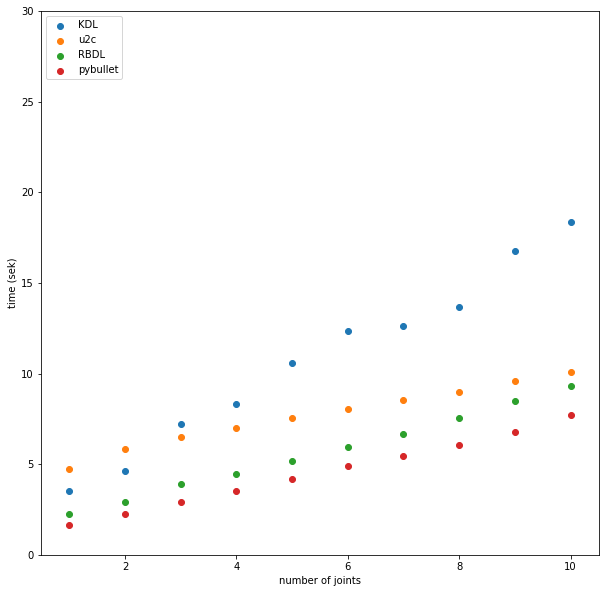

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
med_fig = plt.figure(figsize = (10, 10))
plt.scatter(joint_nr, mediantime_kdl, label='KDL')
#plt.scatter(joint_nr, mediantime_u2c, c='hotpink', label='u2c')
plt.scatter(joint_nr, mintime_u2c, label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, label='RBDL')
plt.scatter(joint_nr, mediantime_pb, label='pybullet')
plt.xlabel("number of joints")
plt.ylabel("time (sek)")
plt.ylim(0, 30)
plt.legend(loc='upper left')
med_fig.show()

